<a href="https://colab.research.google.com/github/hamza3laa/hamza3laa/blob/main/StartupsUseCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Machine learning/Datasets/startups.csv')

In [4]:
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [5]:
df.shape

(50, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


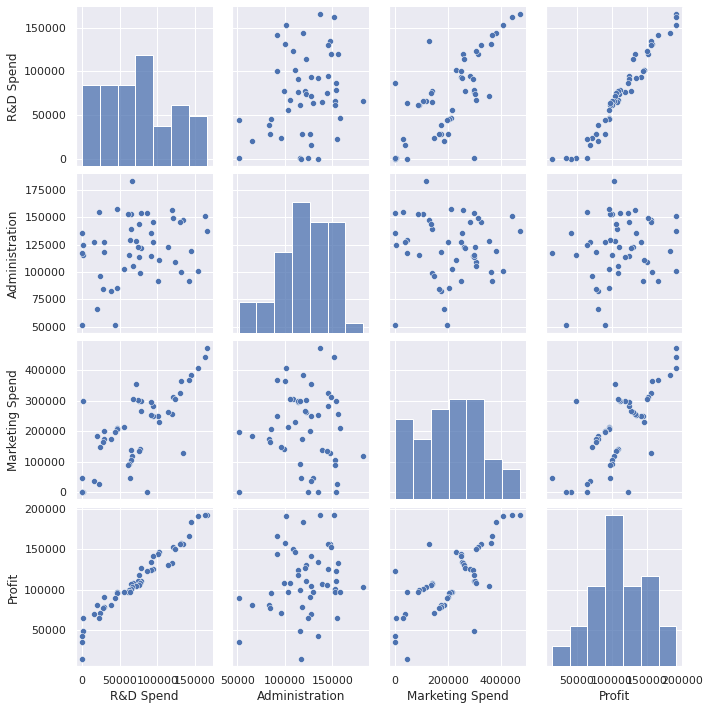

In [7]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



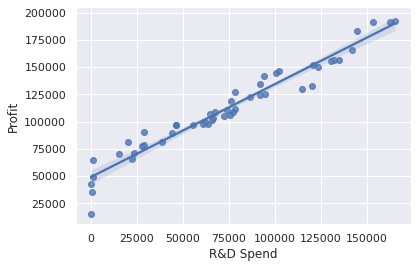

In [10]:
sns.regplot(df['R&D Spend'] , df['Profit'])

In [11]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [12]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
X = df['' , '']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder().fit_transform(df[['State']]).toarray()

In [38]:
df[['New York', 'California' ,'Florida']] = enc
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,New York,California,Florida
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,California,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,166187.94,0.0,1.0,0.0


In [28]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [45]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder().fit_transform(df['State'])
df['EncState'] = enc 

In [46]:
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit,New York,California,Florida,EncState
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,0.0,1.0,2
1,162597.70,151377.59,443898.53,California,191792.06,1.0,0.0,0.0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0.0,1.0,0.0,1


In [98]:
df.describe().columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit', 'New York',
       'California', 'Florida', 'EncState'],
      dtype='object')

In [99]:
X =df[['R&D Spend', 'Administration', 'Marketing Spend','EncState']]
y=df['Profit']

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)

In [109]:
model.coef_

array([ 7.84422172e-01, -3.62172249e-02,  3.51177170e-02,  7.14125265e+02])

In [110]:
model.intercept_

50872.894127094514

In [111]:
y_pred = model.predict(X_test)

In [112]:
# y = itercept + co*X1 + co*X2 +co*X3 + coX4

In [113]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)


0.9372763882276182